In [5]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

## Handling Outliers

Using IQR

https://blog.zhaytam.com/img/800px-Boxplot_vs_PDF.svg-1-768x557.png

<Axes: >

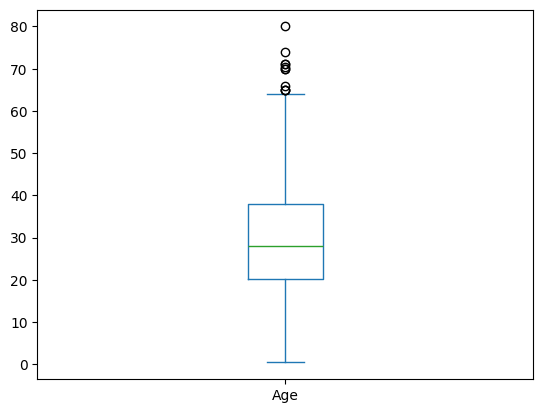

In [6]:
titanic_df.Age.plot.box()

In [7]:
Q1 = titanic_df.Age.quantile(q = 0.25)
Q3 = titanic_df.Age.quantile(q = 0.75)
IQR = Q3 -Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(upper_limit, lower_limit)


64.8125 -6.6875


In [8]:
titanic_df[(titanic_df.Age > upper_limit) | (titanic_df.Age < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


### Using Z-score

```python
sample = [150,155,160,165,170,175,180]

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof =1 )

z_score = (sample - sample_mean) / (sample_std)

for i, z in enumerate(z_score):
    print(f"Data point {i+1}. {sample[i]} has z-score = {z:.3f}")
```

In [28]:
# scipy.stats.zscore

z_score_thres = 2.5

age_mean = titanic_df.Age.mean()
age_std = titanic_df.Age.std()

zscore = abs((titanic_df.Age - age_mean) / age_std)

# OR
# import scipy
# zscore = scipy.stats.zscore(titanic_df.Age.to_numpy(), ddof = 1, nan_policy = 'omit')

titanic_df['Z-score'] = zscore


In [29]:
titanic_df[titanic_df['Z-score'] > z_score_thres]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Z-score
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,2.843141
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,2.808721
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,2.843141
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.462699
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,2.774301
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2.774301
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,3.049660
